### Part 1 - Data Exploration

#### Reading in the CSV

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'retina'


df = pd.read_csv('earnings_train.csv')
df

,DISTRICT_TYPE,DISTRICT_NAME,DISTRICT_CODE,ACADEMIC_YEAR,DEMO_CATEGORY,STUDENT_POPULATION,AWARD_CATEGORY,WAGE_YEAR1,WAGE_YEAR2,WAGE_YEAR3,WAGE_YEAR4
0,School District,Duarte Unified,1964469.0,2018-2019,Race,None Reported,Bachelor's Degree - Did Not Transfer,0.0,0.0,0.0,0.0
1,School District,Coronado Unified,3768031.0,2018-2019,Race,None Reported,Associate Degree,0.0,0.0,0.0,0.0
2,School District,Gilroy Unified,4369484.0,2018-2019,Race,Black or African American,Bachelor's Degree - Did Not Transfer,0.0,0.0,0.0,0.0
3,School District,Pleasant Valley,5672553.0,2018-2019,Homeless Status,Did Not Experience Homelessness in K-12,Community College Certificate,0.0,0.0,0.0,0.0
4,Legislative District,Senate District 15,NaN,2018-2019,Race,American Indian or Alaska Native,Community College Certificate,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
20700,School District,Armona Union Elementary,1663875.0,2018-2019,Race,American Indian or Alaska Native,Associate Degree,0.0,0.0,0.0,0.0
20701,School District,Taft Union High,1563818.0,2018-2019,Race,White,Community College Certificate,0.0,0.0,0.0,0.0
20702,School District,Bassett Unified,1964295.0,2018-2019,Foster Status,Foster Youth,Bachelor's Degree - Did Not Transfer,0.0,0.0,0.0,0.0
20703,School District,SBE - John Henry High,777354.0,2018-2019,Gender,Male,Bachelor's Degree - Did Not Transfer,0.0,0.0,0.0,0.0


#### Initial EDA

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20705 entries, 0 to 20704
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DISTRICT_TYPE       20705 non-null  object 
 1   DISTRICT_NAME       20705 non-null  object 
 2   DISTRICT_CODE       17960 non-null  float64
 3   ACADEMIC_YEAR       20705 non-null  object 
 4   DEMO_CATEGORY       20705 non-null  object 
 5   STUDENT_POPULATION  20705 non-null  object 
 6   AWARD_CATEGORY      20705 non-null  object 
 7   WAGE_YEAR1          20705 non-null  float64
 8   WAGE_YEAR2          20705 non-null  float64
 9   WAGE_YEAR3          20705 non-null  float64
 10  WAGE_YEAR4          20705 non-null  float64
dtypes: float64(5), object(6)
memory usage: 1.7+ MB


In [39]:
df.describe()


,DISTRICT_CODE,WAGE_YEAR1,WAGE_YEAR2,WAGE_YEAR3,WAGE_YEAR4
count,1.796000e+04,20705.000000,20705.000000,20705.000000,20705.000000
mean,3.041331e+06,4476.106834,6075.533253,7310.831635,8530.890413
std,1.583286e+06,11944.502346,16140.916903,19158.203471,22106.663179
min,1.100170e+05,0.000000,0.000000,0.000000,0.000000
25%,1.864089e+06,0.000000,0.000000,0.000000,0.000000
50%,3.166852e+06,0.000000,0.000000,0.000000,0.000000
75%,4.277214e+06,0.000000,0.000000,0.000000,0.000000
max,5.872769e+06,97993.000000,132847.000000,146728.000000,153910.000000


#### Unique values for the categorical columns

In [40]:
df.DISTRICT_TYPE.value_counts()

DISTRICT_TYPE
School District         17960
Legislative District     2702
All                        43
Name: count, dtype: int64

In [41]:
df.DISTRICT_NAME.value_counts()

DISTRICT_NAME
Southern Trinity Joint Unified              56
Trinity County Office of Education          55
Santa Barbara County Office of Education    54
Big Sur Unified                             50
Spencer Valley Elementary                   50
                                            ..
West Contra Costa Unified                   16
Oroville Union High                         15
Visalia Unified                             15
Fairfield-Suisun Unified                    13
San Francisco Unified                       13
Name: count, Length: 692, dtype: int64

In [42]:
df.ACADEMIC_YEAR.value_counts()

ACADEMIC_YEAR
2018-2019    20705
Name: count, dtype: int64

In [43]:
df.DEMO_CATEGORY.value_counts()

DEMO_CATEGORY
Race               12116
Foster Status       2754
Homeless Status     2308
Gender              2291
All                 1236
Name: count, dtype: int64

In [44]:
df.STUDENT_POPULATION.value_counts()

STUDENT_POPULATION
None Reported                                1927
American Indian or Alaska Native             1833
Native Hawaiian or Other Pacific Islander    1810
Foster Youth                                 1739
Two or More Races                            1539
Black or African American                    1484
Experienced Homelessness in K-12             1472
Asian                                        1372
All                                          1236
Male                                         1171
Female                                       1120
White                                        1089
Hispanic or Latino                           1062
Not Foster Youth                             1015
Did Not Experience Homelessness in K-12       836
Name: count, dtype: int64

In [45]:
df.AWARD_CATEGORY.value_counts()

AWARD_CATEGORY
Bachelor's Degree - Transferred         5594
Bachelor's Degree - Did Not Transfer    5220
Community College Certificate           5196
Associate Degree                        4695
Name: count, dtype: int64

#### Pairplot to understand relationship between features

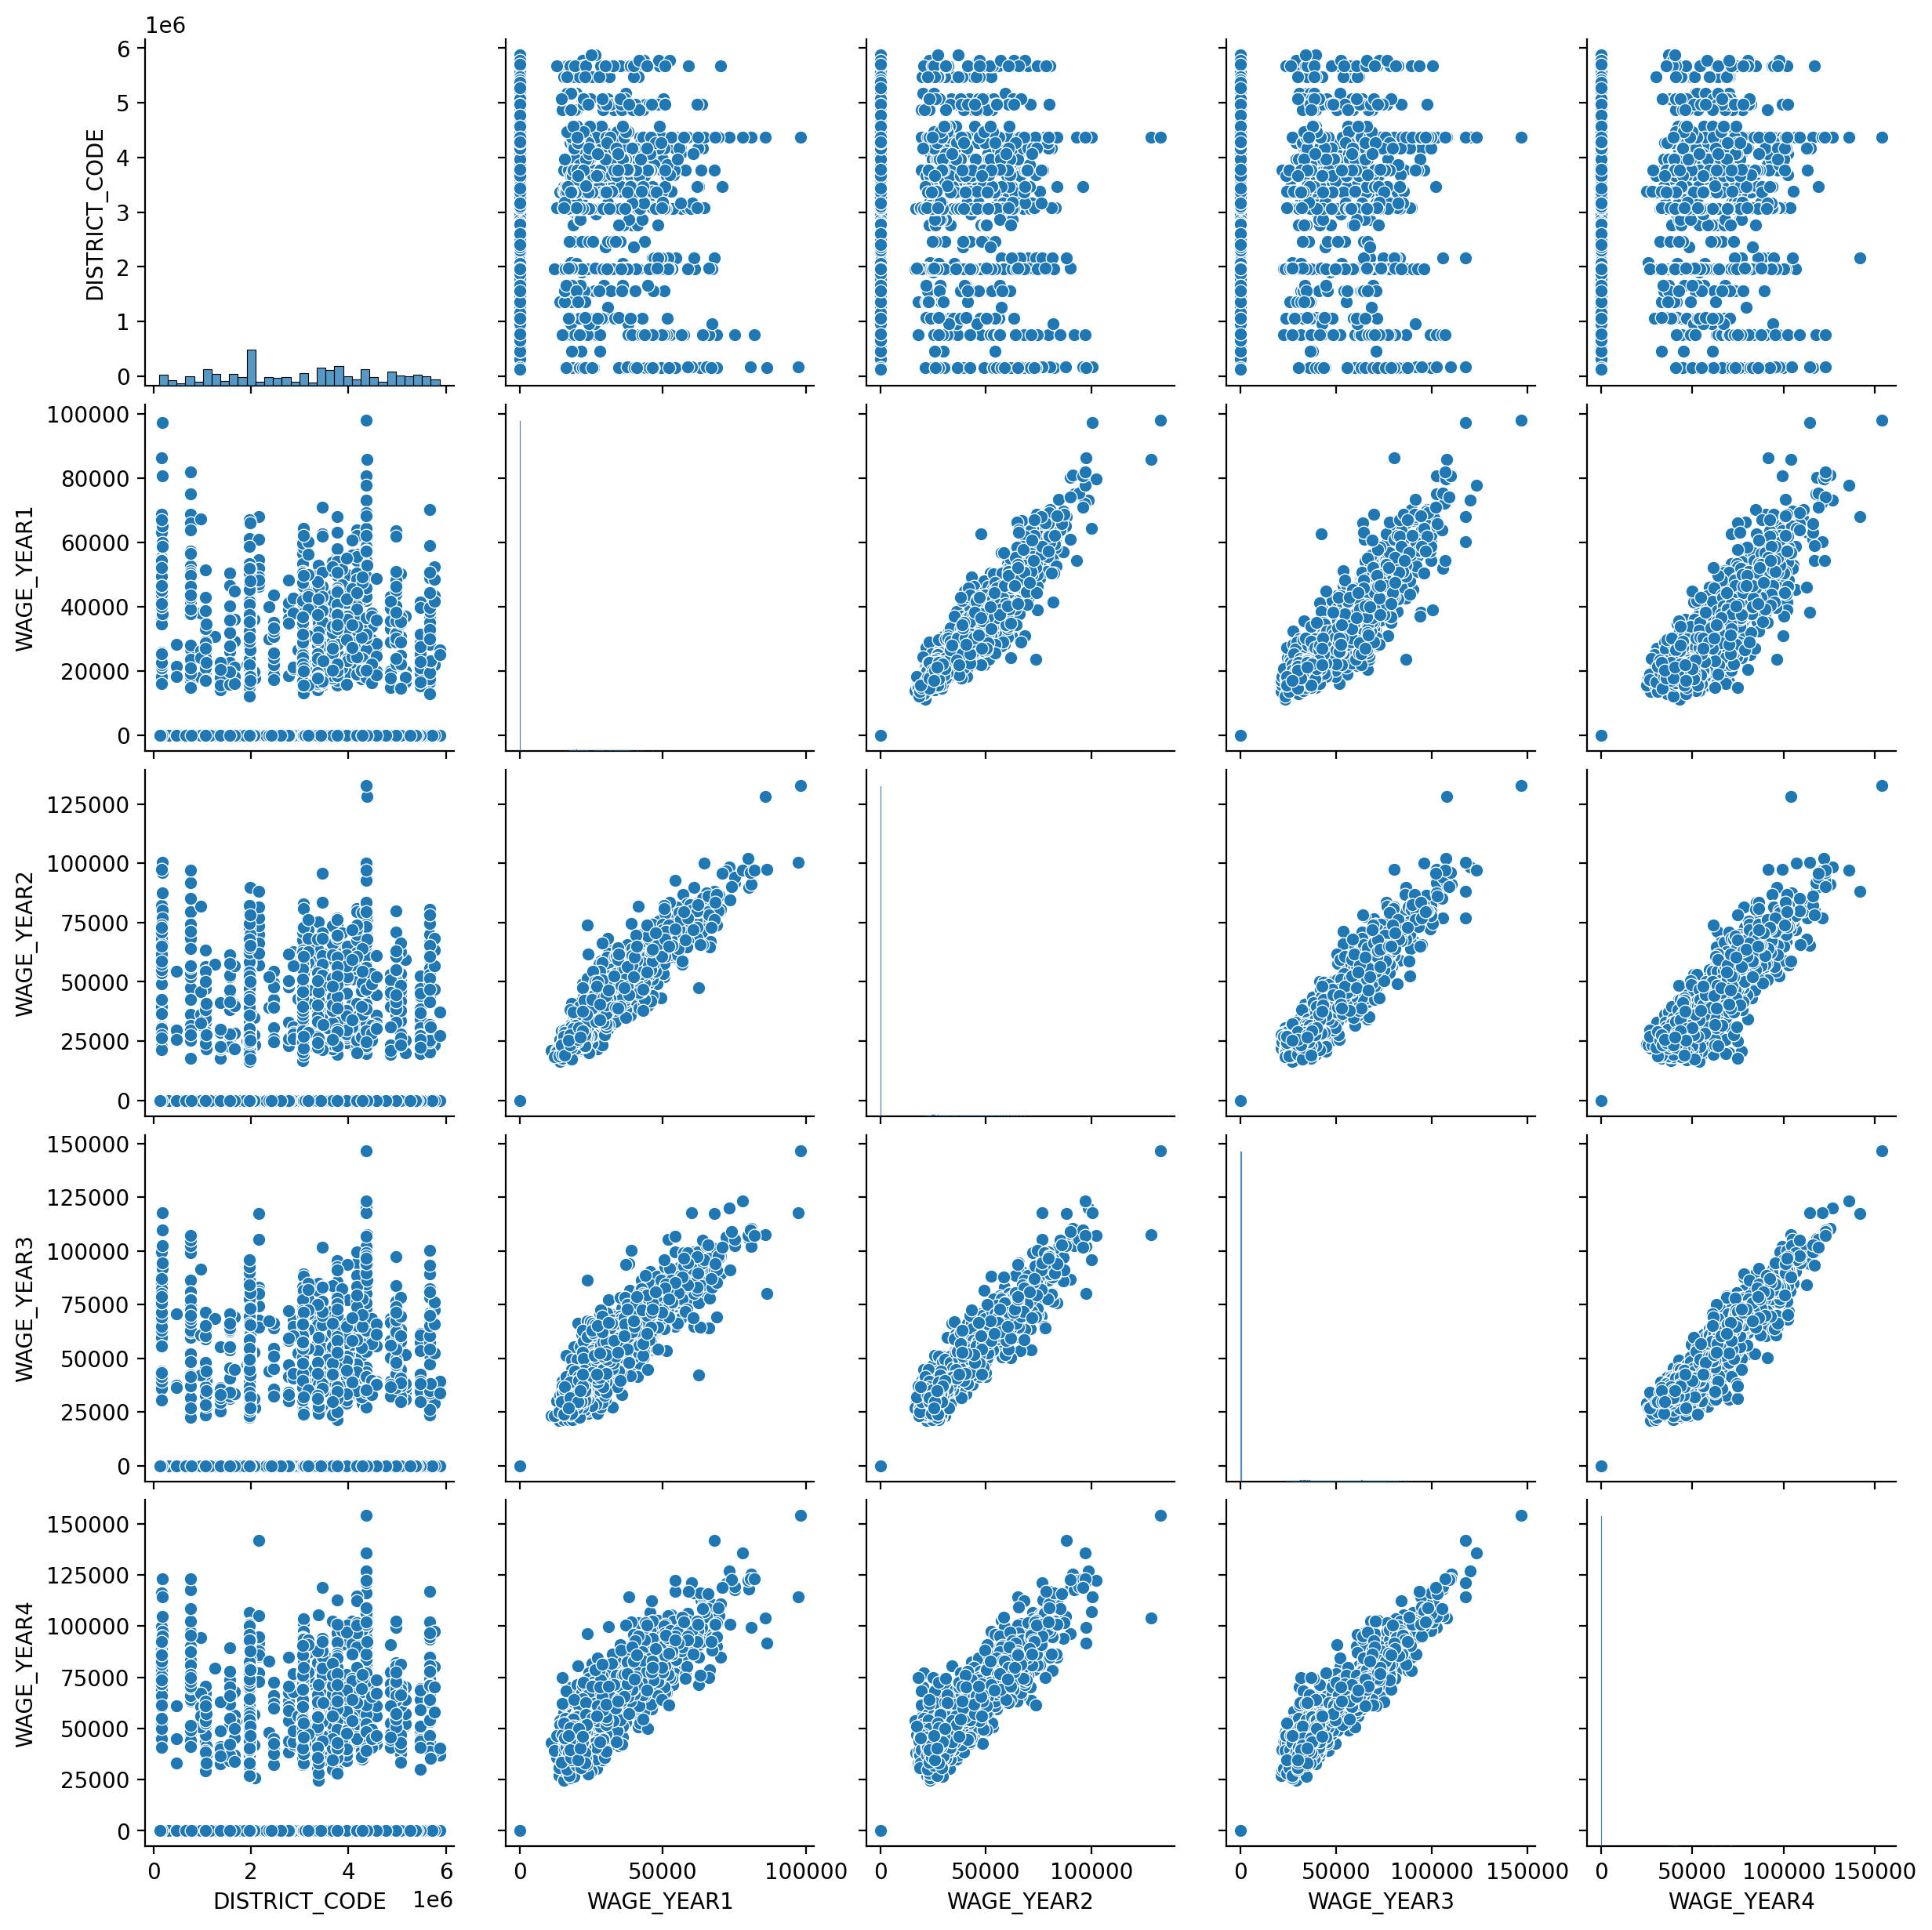

In [46]:
sns.pairplot(df, vars=['DISTRICT_CODE', 'WAGE_YEAR1', 'WAGE_YEAR2', 'WAGE_YEAR3', 'WAGE_YEAR4'])
plt.show()

#### Are numerical values normally distributed?

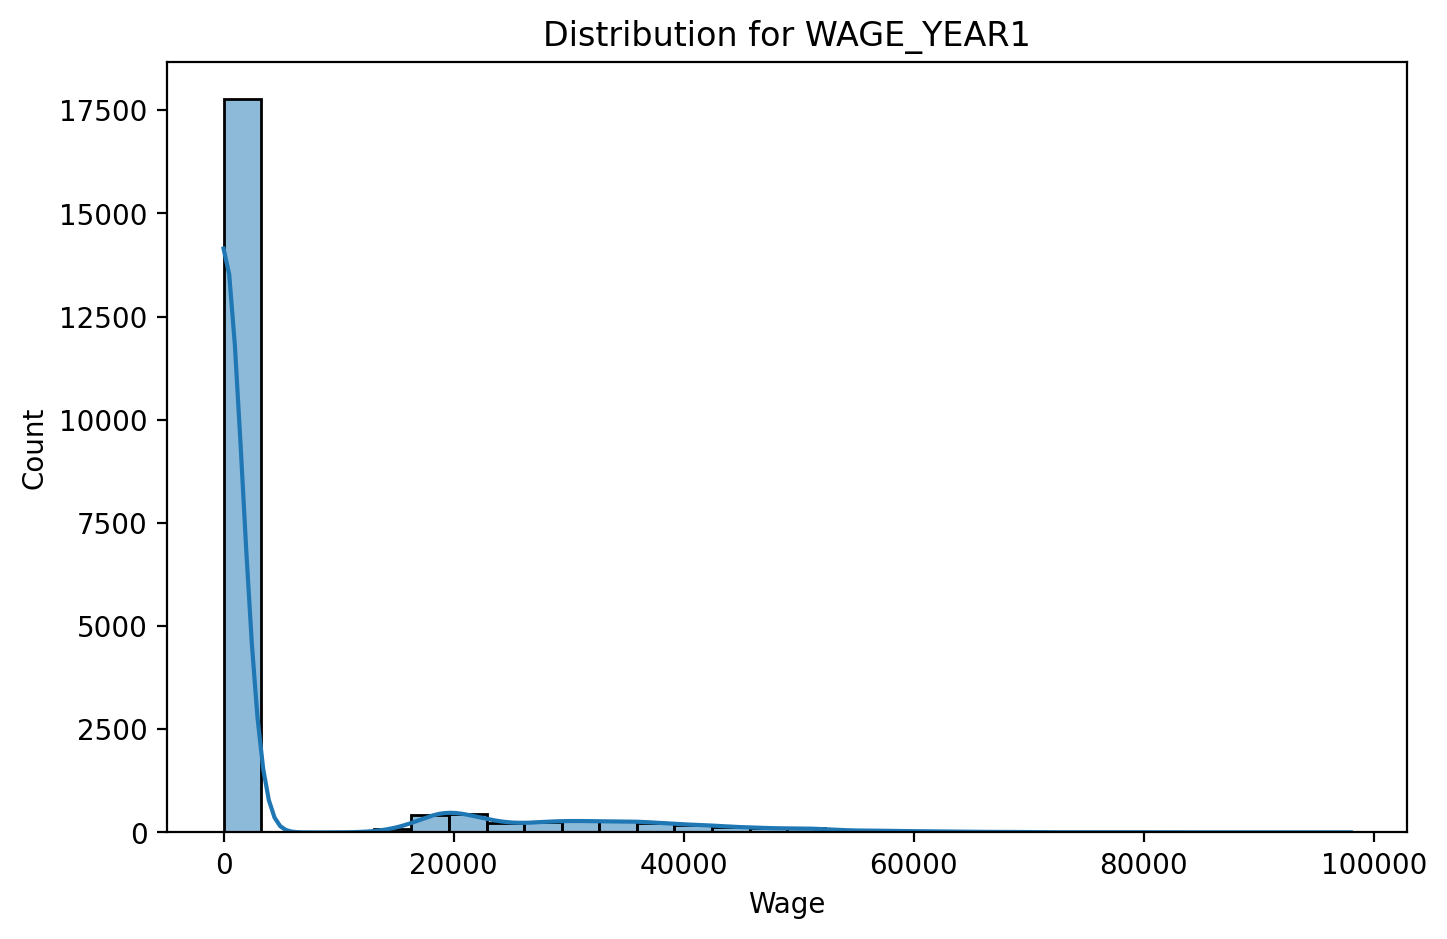

In [47]:
column = df['WAGE_YEAR1']

plt.figure(figsize=(8,5))
sns.histplot(column, bins=30, kde=True)
plt.title('Distribution for WAGE_YEAR1')
plt.xlabel('Wage')
plt.show()

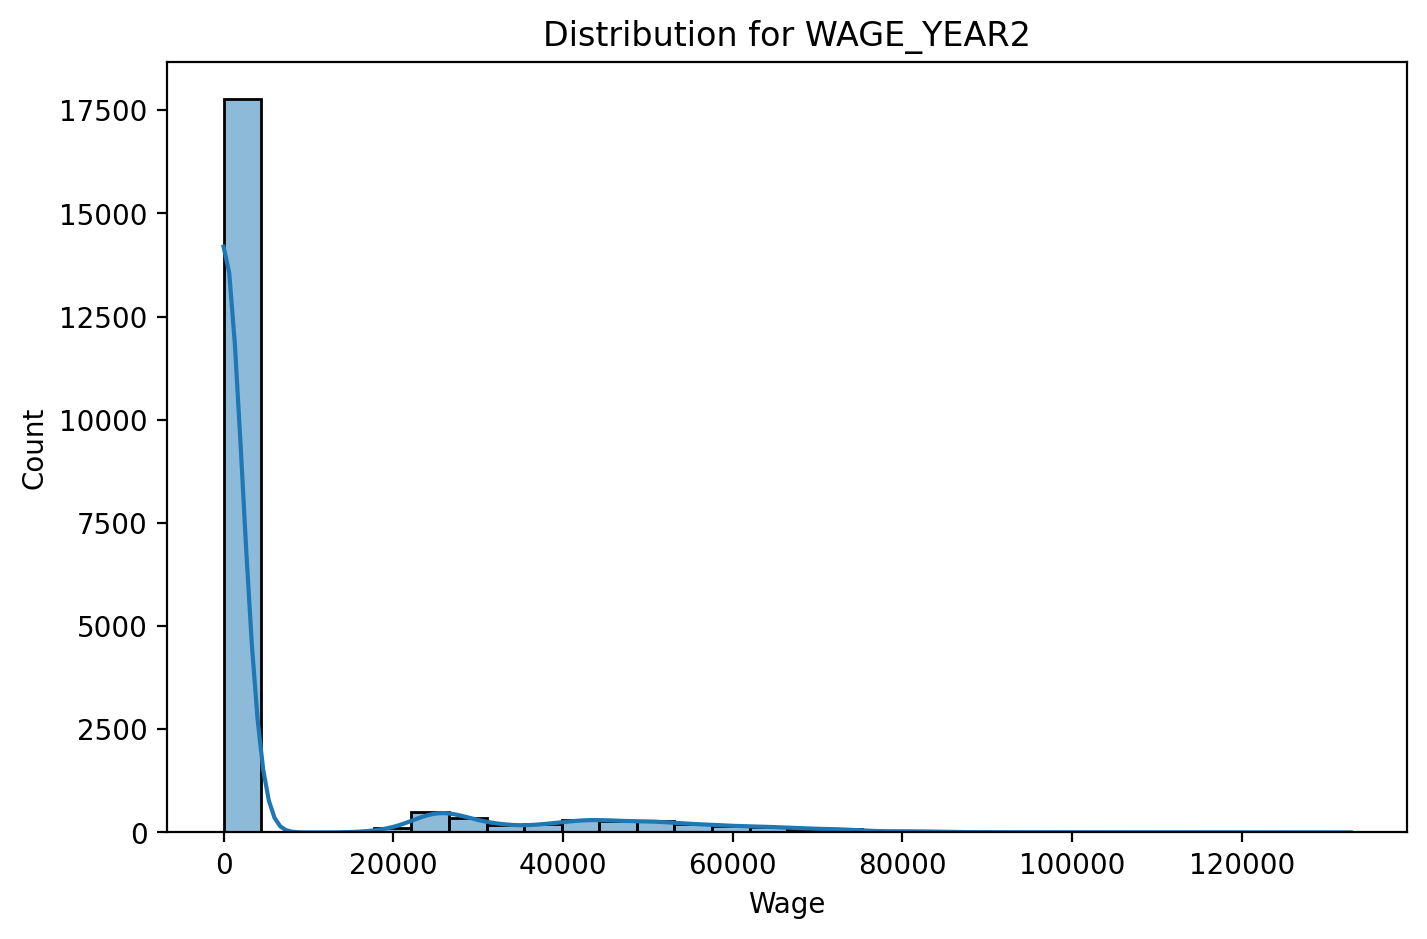

In [48]:
column = df['WAGE_YEAR2']

plt.figure(figsize=(8,5))
sns.histplot(column, bins=30, kde=True)
plt.title('Distribution for WAGE_YEAR2')
plt.xlabel('Wage')
plt.show()

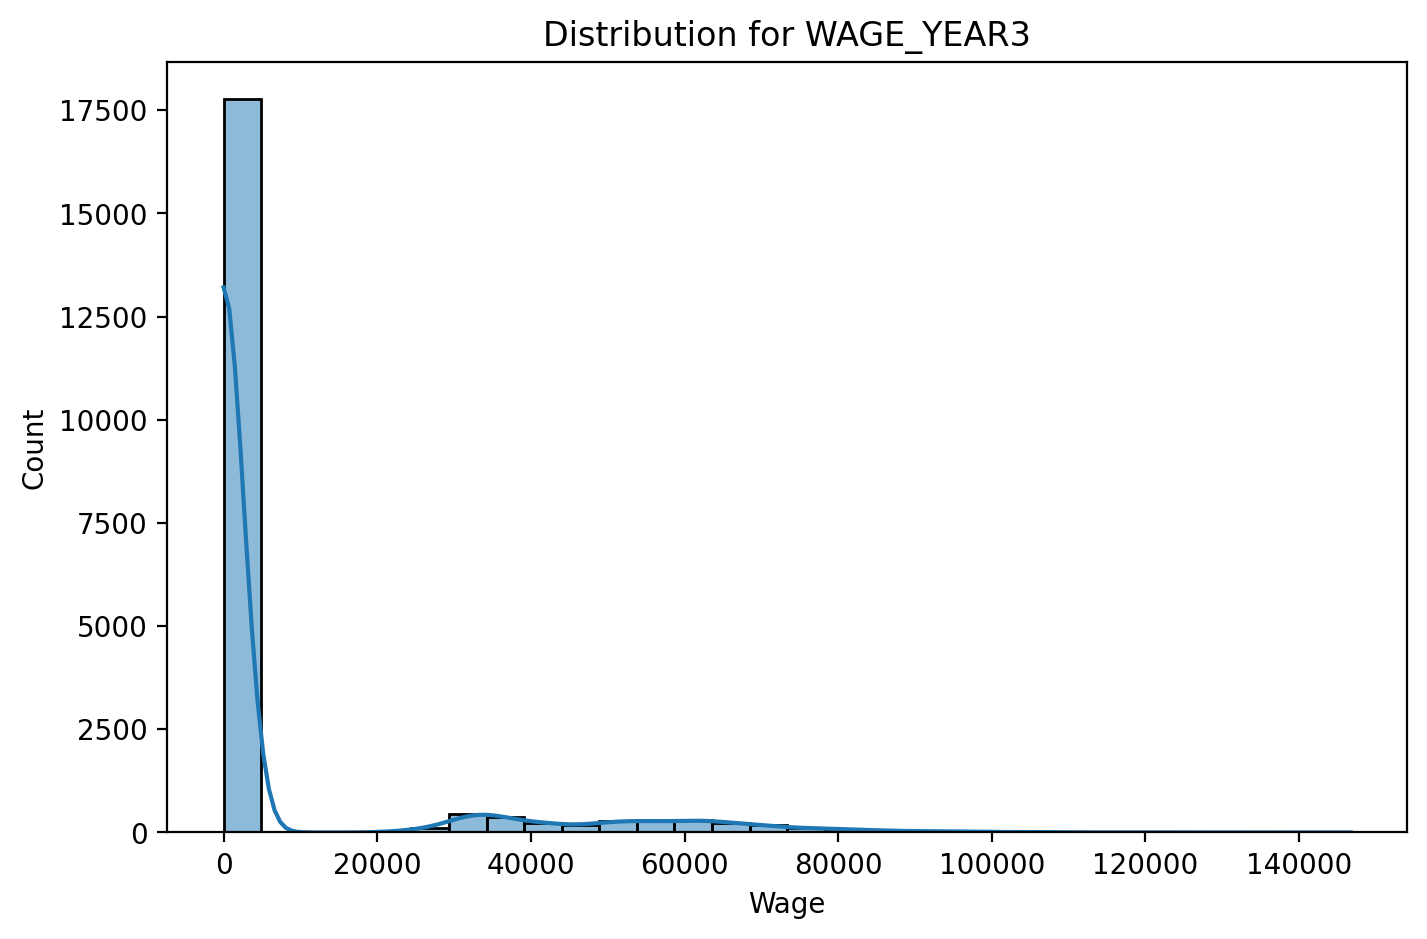

In [49]:
column = df['WAGE_YEAR3']

plt.figure(figsize=(8,5))
sns.histplot(column, bins=30, kde=True)
plt.title('Distribution for WAGE_YEAR3')
plt.xlabel('Wage')
plt.show()

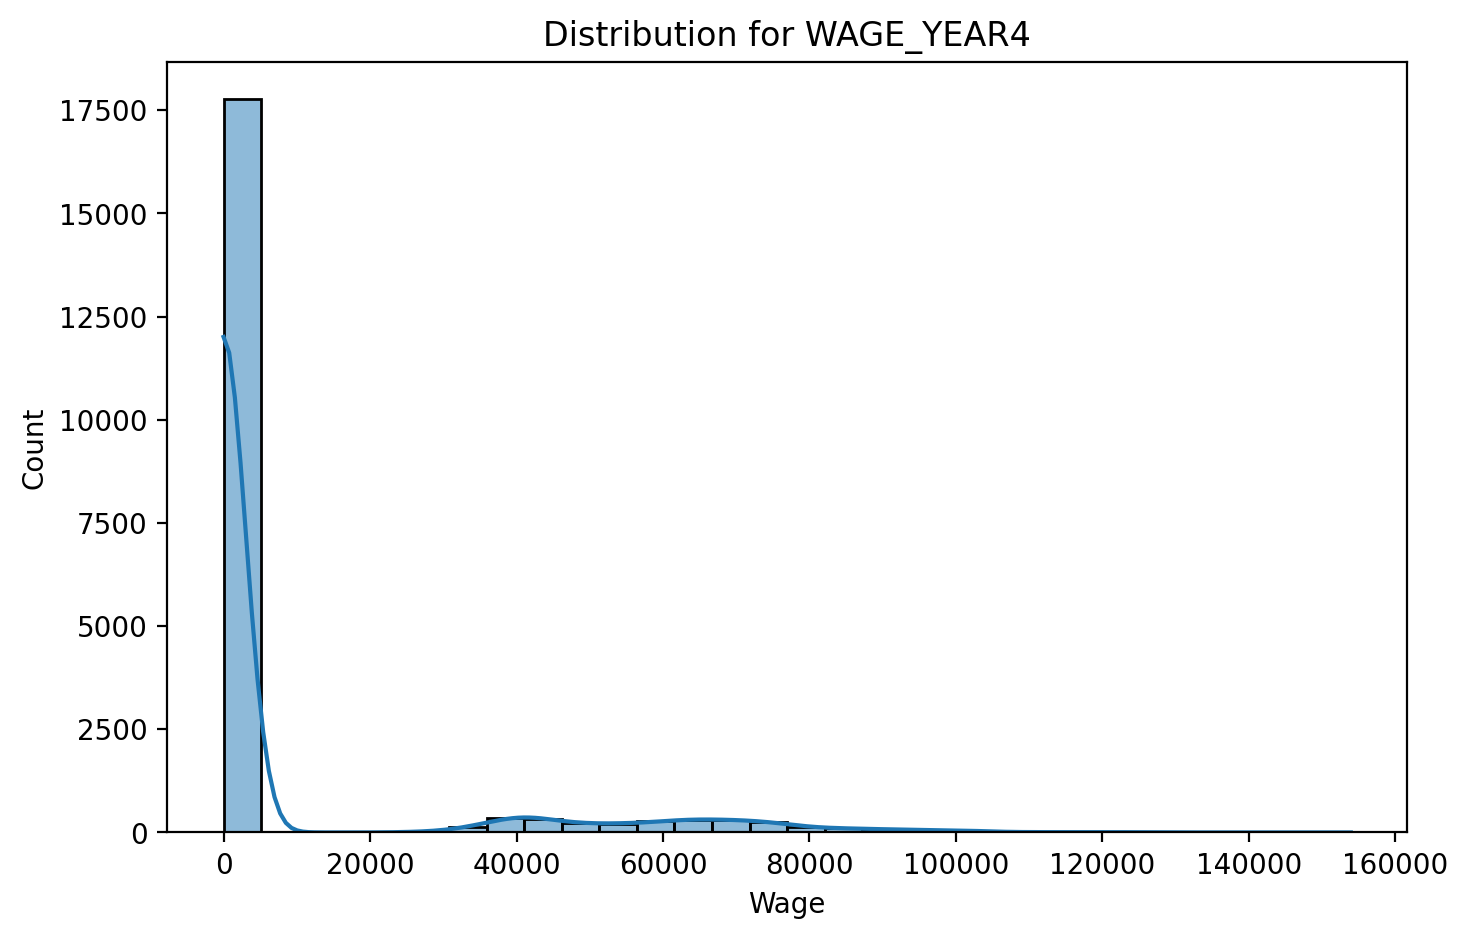

In [50]:
column = df['WAGE_YEAR4']

plt.figure(figsize=(8,5))
sns.histplot(column, bins=30, kde=True)
plt.title('Distribution for WAGE_YEAR4')
plt.xlabel('Wage')
plt.show()

#### Are any features correlated? 

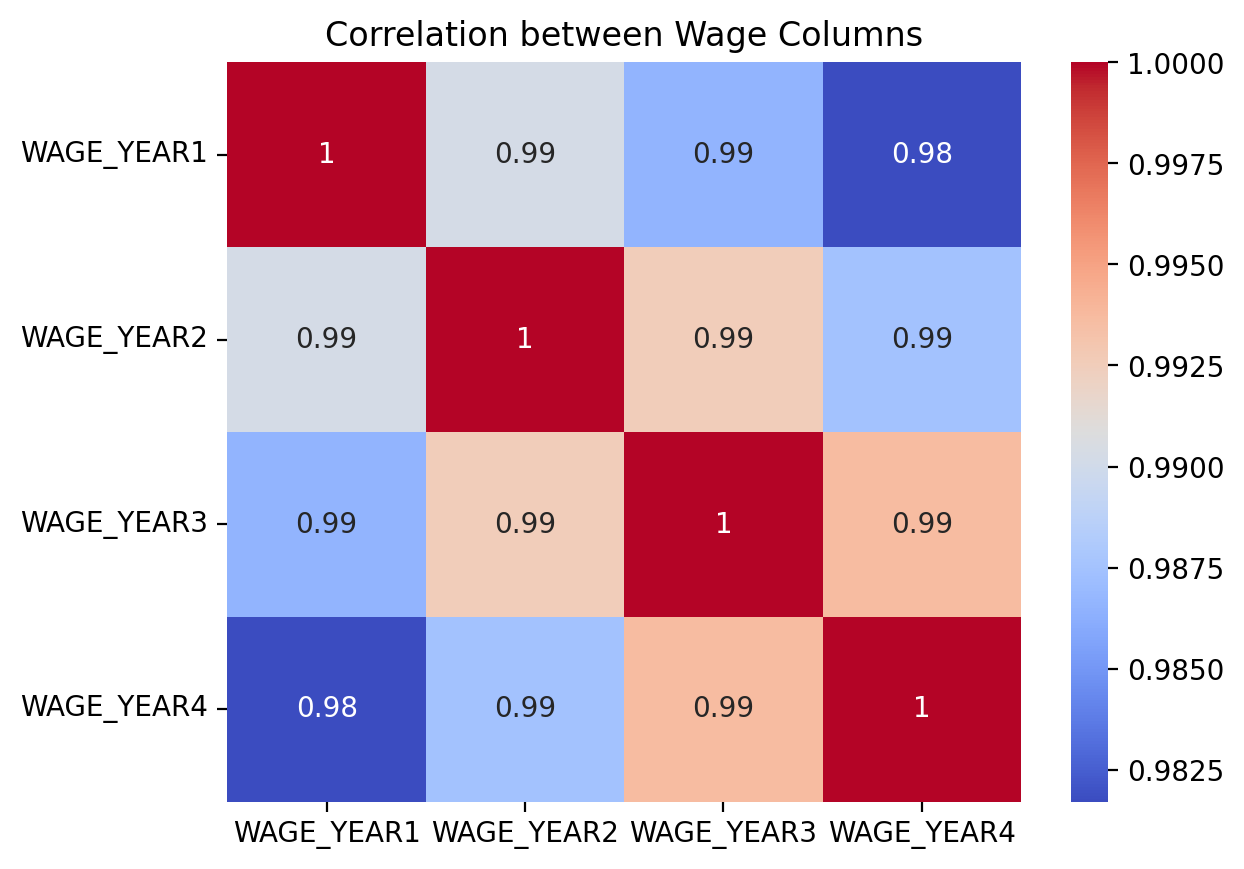

In [51]:
corr = df[['WAGE_YEAR1','WAGE_YEAR2','WAGE_YEAR3','WAGE_YEAR4']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation between Wage Columns")
plt.show()


### Part 2 - Predicting ```WAGE_YEAR_4```
 1. Drop target from X
 2. Impute missing district codes with 0 
 3. One-hot encode all the categorical features
 4. Split training data into train set and validation set

In [52]:
target = "WAGE_YEAR4"
X = df.drop(columns=[target])
y = df[target]

In [53]:
X["DISTRICT_CODE"] = X["DISTRICT_CODE"].fillna(0)

X = pd.get_dummies(X)
X

,DISTRICT_CODE,WAGE_YEAR1,WAGE_YEAR2,WAGE_YEAR3,DISTRICT_TYPE_All,DISTRICT_TYPE_Legislative District,DISTRICT_TYPE_School District,DISTRICT_NAME_ABC Unified,DISTRICT_NAME_Acalanes Union High,DISTRICT_NAME_Acton-Agua Dulce Unified,...,STUDENT_POPULATION_Male,STUDENT_POPULATION_Native Hawaiian or Other Pacific Islander,STUDENT_POPULATION_None Reported,STUDENT_POPULATION_Not Foster Youth,STUDENT_POPULATION_Two or More Races,STUDENT_POPULATION_White,AWARD_CATEGORY_Associate Degree,AWARD_CATEGORY_Bachelor's Degree - Did Not Transfer,AWARD_CATEGORY_Bachelor's Degree - Transferred,AWARD_CATEGORY_Community College Certificate
0,1964469.0,0.0,0.0,0.0,False,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
1,3768031.0,0.0,0.0,0.0,False,False,True,False,False,False,...,False,False,True,False,False,False,True,False,False,False
2,4369484.0,0.0,0.0,0.0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,5672553.0,0.0,0.0,0.0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,0.0,0.0,0.0,0.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20700,1663875.0,0.0,0.0,0.0,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
20701,1563818.0,0.0,0.0,0.0,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
20702,1964295.0,0.0,0.0,0.0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
20703,777354.0,0.0,0.0,0.0,False,False,True,False,False,False,...,True,False,False,False,False,False,False,True,False,False


In [54]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

In [55]:
lr = LinearRegression()
lr.fit(X_train, y_train)

preds = lr.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, preds))
rmse

np.float64(2453.167189266423)

### CART

In [56]:
cart = DecisionTreeRegressor(random_state=42)
cart.fit(X_train, y_train)

cart_preds = cart.predict(X_val)
cart_rmse = np.sqrt(mean_squared_error(y_val, cart_preds))
cart_rmse


np.float64(2311.578512304145)

### KNN

In [57]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

knn_preds = knn.predict(X_val_scaled)
knn_rmse = np.sqrt(mean_squared_error(y_val, knn_preds))
knn_rmse


np.float64(9726.061847231884)

In [58]:
for k in [3, 5, 7, 9, 11]:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    preds = knn.predict(X_val_scaled)
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    print(k, rmse)


3 8745.471906278464
5 9726.061847231884
7 11218.427456722384
9 12637.286154110507
11 14044.641696607669


Out of the 3 models, Linear Regression and CART seem to give the lowest RMSE scores. CART can be used for final predictions since it has a lower score.  

Linear Regression RMSE - 2453.16  
CART RMSE - 2311.57

### Prediction on test set

In [59]:
test_df = pd.read_csv("earnings_test_features.csv")
test_df


,DISTRICT_TYPE,DISTRICT_NAME,DISTRICT_CODE,ACADEMIC_YEAR,DEMO_CATEGORY,STUDENT_POPULATION,AWARD_CATEGORY,WAGE_YEAR1,WAGE_YEAR2,WAGE_YEAR3
0,School District,SBE - Academia Avance Charter,1976968.0,2018-2019,Race,White,Bachelor's Degree - Transferred,0.0,0.0,0.0
1,Legislative District,Assembly District 38,NaN,2018-2019,Homeless Status,Experienced Homelessness in K-12,Associate Degree,22640.0,32741.0,36982.0
2,School District,Santa Clara County Office of Education,4310439.0,2018-2019,Foster Status,Foster Youth,Community College Certificate,0.0,0.0,0.0
3,Legislative District,Senate District 40,NaN,2018-2019,Homeless Status,Experienced Homelessness in K-12,Bachelor's Degree - Transferred,0.0,0.0,0.0
4,School District,Central Union High,1363115.0,2018-2019,Foster Status,Not Foster Youth,Associate Degree,16237.0,21844.0,32594.0
...,...,...,...,...,...,...,...,...,...,...
6897,School District,Santa Clara County Office of Education,4310439.0,2018-2019,Homeless Status,Did Not Experience Homelessness in K-12,Bachelor's Degree - Did Not Transfer,0.0,0.0,0.0
6898,School District,Butte Valley Unified,4773684.0,2018-2019,Foster Status,Foster Youth,Bachelor's Degree - Did Not Transfer,0.0,0.0,0.0
6899,All,All,NaN,2018-2019,Race,Black or African American,Associate Degree,19369.0,26101.0,31282.0
6900,School District,Fort Sage Unified,1875036.0,2018-2019,Homeless Status,Experienced Homelessness in K-12,Bachelor's Degree - Did Not Transfer,0.0,0.0,0.0


In [60]:
test_df = pd.get_dummies(test_df)
test_df

,DISTRICT_CODE,WAGE_YEAR1,WAGE_YEAR2,WAGE_YEAR3,DISTRICT_TYPE_All,DISTRICT_TYPE_Legislative District,DISTRICT_TYPE_School District,DISTRICT_NAME_ABC Unified,DISTRICT_NAME_Acalanes Union High,DISTRICT_NAME_Acton-Agua Dulce Unified,...,STUDENT_POPULATION_Male,STUDENT_POPULATION_Native Hawaiian or Other Pacific Islander,STUDENT_POPULATION_None Reported,STUDENT_POPULATION_Not Foster Youth,STUDENT_POPULATION_Two or More Races,STUDENT_POPULATION_White,AWARD_CATEGORY_Associate Degree,AWARD_CATEGORY_Bachelor's Degree - Did Not Transfer,AWARD_CATEGORY_Bachelor's Degree - Transferred,AWARD_CATEGORY_Community College Certificate
0,1976968.0,0.0,0.0,0.0,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,NaN,22640.0,32741.0,36982.0,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,4310439.0,0.0,0.0,0.0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,NaN,0.0,0.0,0.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,1363115.0,16237.0,21844.0,32594.0,False,False,True,False,False,False,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6897,4310439.0,0.0,0.0,0.0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6898,4773684.0,0.0,0.0,0.0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
6899,NaN,19369.0,26101.0,31282.0,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
6900,1875036.0,0.0,0.0,0.0,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [61]:
test_preds = cart.predict(test_df)
test_preds

array([    0., 47804.,     0., ..., 38139.,     0.,     0.], shape=(6902,))

In [62]:
preds_df = pd.DataFrame(test_preds, columns=["WAGE_YEAR4"])
preds_df.to_csv("preds.csv", index=False)
preds_df


,WAGE_YEAR4
0,0.0
1,47804.0
2,0.0
3,0.0
4,36872.0
...,...
6897,0.0
6898,0.0
6899,38139.0
6900,0.0


### Part 3 - Reflection

Feature importances

In [63]:
importances = cart.feature_importances_

feature_importances = (
    pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': importances
    })
    .sort_values(by='Importance', ascending=False)
)

top10 = feature_importances.head(10)
print(top10)


                                               Feature  Importance
3                                           WAGE_YEAR3    0.990935
2                                           WAGE_YEAR2    0.001347
1                                           WAGE_YEAR1    0.001294
0                                        DISTRICT_CODE    0.000858
541             DISTRICT_NAME_San Ramon Valley Unified    0.000329
721  AWARD_CATEGORY_Bachelor's Degree - Did Not Tra...    0.000234
209                        DISTRICT_NAME_Dixon Unified    0.000215
707                           STUDENT_POPULATION_Asian    0.000194
696                    DISTRICT_NAME_Yuba City Unified    0.000131
312                 DISTRICT_NAME_Laguna Beach Unified    0.000116


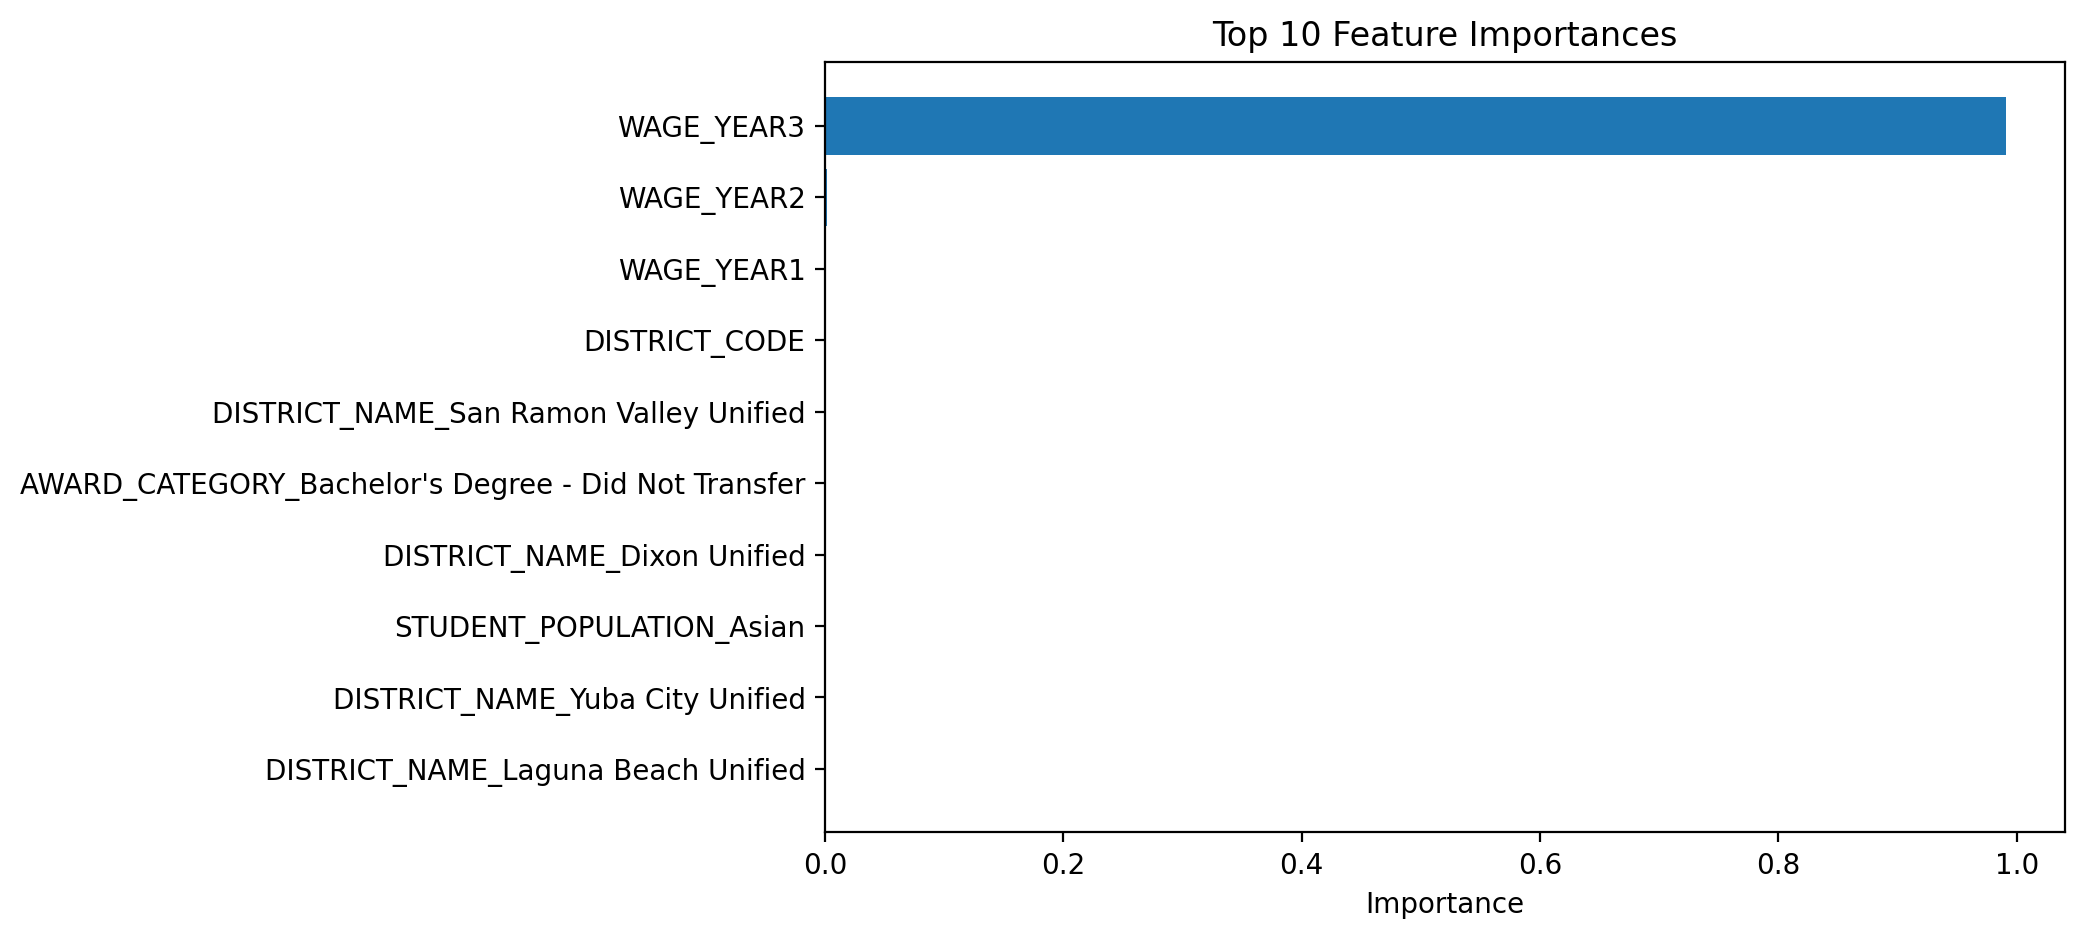

In [64]:
plt.figure(figsize=(8, 5))
plt.barh(top10['Feature'], top10['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Top 10 Feature Importances')
plt.show()